# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
 77% 4.00M/5.21M [00:01<00:00, 4.66MB/s]
100% 5.21M/5.21M [00:01<00:00, 4.21MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_O

## Import Libraries

In [2]:
import pandas as pd

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
train_empty = '/content/ParkingLot_Occupation/train/empty'
train_occ = '/content/ParkingLot_Occupation/train/occupied'
test_empty = '/content/ParkingLot_Occupation/test/empty'
test_occ = '/content/ParkingLot_Occupation/test/occupied'

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
    directory='/content/ParkingLot_Occupation/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory='/content/ParkingLot_Occupation/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory='/content/ParkingLot_Occupation/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1175 images belonging to 2 classes.
Found 207 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [17]:
his = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.6839 - loss: 0.6826 - val_accuracy: 0.9179 - val_loss: 0.1498
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9773 - loss: 0.0853 - val_accuracy: 0.9420 - val_loss: 0.1311
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9725 - loss: 0.0820 - val_accuracy: 0.9662 - val_loss: 0.1016
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9870 - loss: 0.0447 - val_accuracy: 0.9710 - val_loss: 0.0815
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9890 - loss: 0.0298 - val_accuracy: 0.9662 - val_loss: 0.1218
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9885 - loss: 0.0287 - val_accuracy: 0.9855 - val_loss: 0.0535
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9918 - loss: 0.0238 - val_accuracy: 0.9517 - val_loss: 0.1282
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9710 - loss: 0.0940 - val_accuracy: 0.9807 -

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [19]:
test_loss, test_acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9685 - loss: 0.0984
Loss: 0.119
Accuracy: 96.135


## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
# !kaggle datasets download -d khaledzsa/parkinglot-occupation
# !unzip parkinglot-occupation.zip

In [20]:
predict = model.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


In [21]:
predict

array([[1.        ],
       [0.00328122],
       [0.9999856 ],
       [0.01121592],
       [0.00511058],
       [0.00196349],
       [0.00416521],
       [0.00396492],
       [0.9985493 ],
       [0.00291407],
       [0.01671273],
       [0.05018209],
       [0.00262231],
       [0.00933603],
       [1.        ],
       [0.003933  ],
       [1.        ],
       [1.        ],
       [0.06065429],
       [0.00295583],
       [0.0053583 ],
       [0.00380553],
       [0.00341329],
       [0.00161922],
       [0.82567394],
       [0.01402592],
       [1.        ],
       [0.64027363],
       [0.8167672 ],
       [1.        ],
       [0.00911537],
       [0.00358868],
       [1.        ],
       [0.00496869],
       [0.00276819],
       [0.00703398],
       [0.00430299],
       [0.00269006],
       [0.0072945 ],
       [0.02123605],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.00364426],
       [0.82459265],
       [1.        ],
       [1.        ],
       [0.999

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

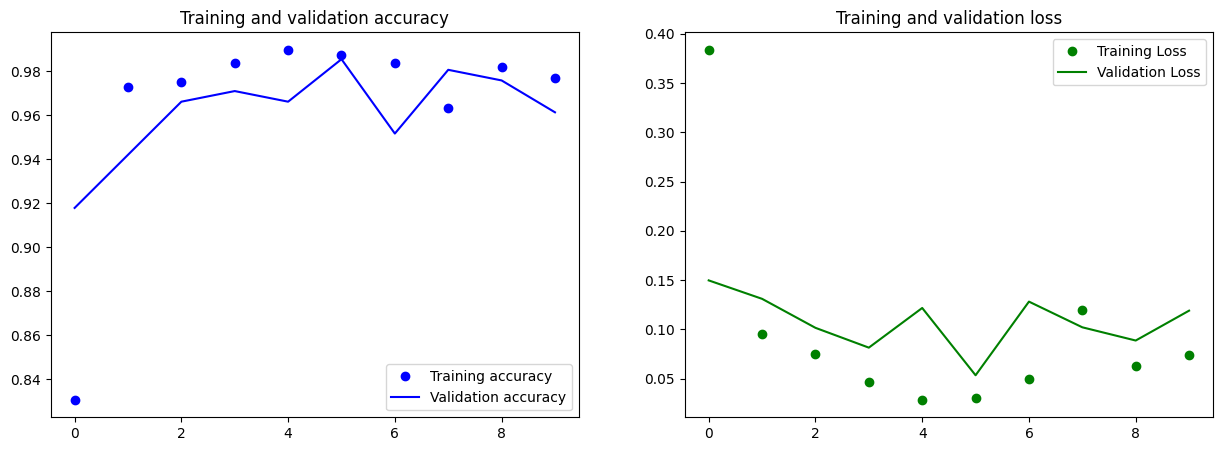

In [22]:
import matplotlib.pyplot as plt

acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

## Save the Model
Save the trained CNN model for submission.

In [24]:
model.save('modelCNN.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

**Data Preprocessing:**

Before feeding the data into the model, we preprocess it to enhance accuracy, reduce complexity, and decrease training time.

**Model Architecture:**

My CNN model consists of three convolutional layers, each followed by a max-pooling layer with 32, 64, and 128 neurons, respectively, using ReLU activation. The architecture also includes a dropout layer, a flatten layer, a dense layer, and finally, an output layer with a sigmoid activation function.

**Activation Functions:**

I chose the sigmoid activation function because the dataset has two classes, requiring a single prediction for binary classification.

**Training Process:**

I used the Adam optimizer, which is generally effective, with a batch size of 32 and 10 epochs, yielding good results.

**Loss Function and Metrics:**

The loss function is 'binary_crossentropy' since the task is binary classification, and the metric used is accuracy.

**Regularization Techniques:**

I incorporated a dropout layer to randomly deactivate some neurons, which helps prevent overfitting.

**Model Evaluation:**

I evaluated the model using the evaluation function on the test data and obtained good results.


**Model Visualization:**

Based on the visualizations, the accuracy of both the training and validation datasets shows a steady increase, indicating good performance. Additionally, the training and validation loss consistently decrease, further confirming the model's effectiveness.

**Overfitting and Underfitting:**

The accuracy and loss on both training and validation data are close, indicating that the model does not suffer from overfitting. Early stopping could also be employed to further mitigate this risk.


------



Thank YOU